# SST long-term trend

Compute the long-term trend in sea surface temperature from 1990 to 2009 using the dataset "Smith and Reynolds NCDC Level 4 Historical Reconstructed SST" from PODAAC / NASA (or any other-20 year period).

https://podaac.jpl.nasa.gov/dataset/REYNOLDS_NCDC_L4_MONTHLY_V5

Implement a function which performs a linear regression:
https://en.wikipedia.org/wiki/Simple_linear_regression


Useful Julia functions for the exercise:
* @sprintf
* Dataset from NCDatasets
* sum, mean


In [3]:
using Statistics
using NCDatasets
using PyPlot
using Missings
using PyCall
using PyCall: PyObject, pyimport

# allow for plotting with missing values
function PyObject(a::Array{Union{T,Missing},N}) where {T,N}
  numpy_ma = pyimport("numpy").ma
  pycall(numpy_ma.array, Any, coalesce.(a,zero(T)), mask=ismissing.(a))
end

PyObject

In [4]:
url = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/2020/01/ersst.v5.202001.nc"

"https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/2020/01/ersst.v5.202001.nc"

In [5]:
ds = Dataset(url)

NCDataset: https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/2020/01/ersst.v5.202001.nc
Group: /

Dimensions
   lat = 89
   lev = 1
   lon = 180
   time = 1

Variables
  lat   (89)
    Datatype:    Float64
    Dimensions:  lat
    Attributes:
     units                = degrees_north
     long_name            = Latitude
     standard_name        = Latitude
     axis                 = Y
     valid_min            = -88.0
     valid_max            = 88.0
     _CoordinateAxisType  = Lat
     coordinate_defines   = center
     comment              = Uniform grid from -88 to 88 by 2

  lev   (1)
    Datatype:    Float64
    Dimensions:  lev
    Attributes:
     units                = meters
     long_name            = Depth of sea surface temperature measurements
     standard_name        = depth
     axis                 = Z
     positive             = down
     _CoordinateAxisType  = Height
     comment              = Actual measurement depth of in situ se

In [6]:
SST = nomissing(ds["sst"][:,:,1,1],NaN);

In [7]:
size(SST)

(180, 89)

In [8]:
lon = nomissing(ds["lon"][:])
lat = nomissing(ds["lat"][:]);



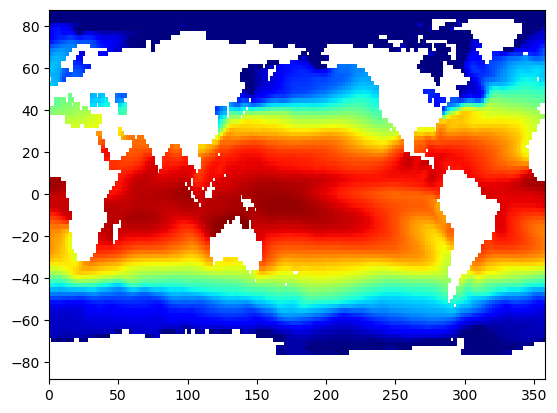

PyObject <matplotlib.collections.PolyCollection object at 0x7ff7be6606d8>

In [9]:
#pcolor(lon,lat,SST')
pcolor(lon,lat,copy(SST'))


In [10]:
close(ds)

closed NetCDF NCDataset

In [12]:
using Printf

SST = zeros(180, 89, 12)
n = 1;

for year = 2016:2016
#for year = 1900:2000
   for month = 1:12
      global n
      month_str = @sprintf("%02d",month)
      # example 
      # https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/2020/01/ersst.v5.202001.nc        
      url = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/$(year)/$(month_str)/ersst.v5.$(year)$(month_str).nc"
      @show url  
      ds = Dataset(url)
      SST[:,:,n] = nomissing(ds["sst"][:,:,1,1],NaN);
      n = n+1
      close(ds)
    end
end

url = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/2016/01/ersst.v5.201601.nc"
url = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/2016/02/ersst.v5.201602.nc"
url = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/2016/03/ersst.v5.201603.nc"
url = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/2016/04/ersst.v5.201604.nc"
url = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/2016/05/ersst.v5.201605.nc"
url = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/2016/06/ersst.v5.201606.nc"
url = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/2016/07/ersst.v5.201607.nc"
url = "https://podaac-opendap.jpl.nasa.gov/opendap/allData/ersst/L4/ncei/v5/monthly/netcdf/2016/08/ersst.v5.201608.nc"
url = "https://podaac-opendap.jpl.nasa.gov/opend

In [13]:
size(SST)

(180, 89, 12)

In [14]:
lon[29]

56.0

In [15]:
findfirst(lon .== 56)

29

In [16]:
lat[20]

-50.0

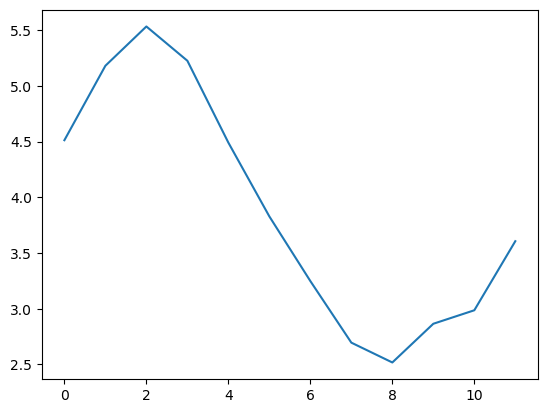

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff7f6bb3438>

In [17]:
plot(SST[29,20,:])